[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wronnyhuang/notebooks/blob/master/TensorFlow_MNIST_tutorial.ipynb)

# TensorFlow Demo: MNIST for ML Beginners
Before start using this, please select `Cell` - `All Output` - `Clear` to clear the old results. See [TensorFlow Tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html) for details of the tutorial.

# Loading MNIST training data

In [2]:
! rm -rf *
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# import matplotlib and numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
# introspect the dataset object
import sys
sys.getsizeof(mnist.train.images)

172480112

## Training Images
![mnist.train.xs](https://www.tensorflow.org/versions/master/images/mnist-train-xs.png)

In [5]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

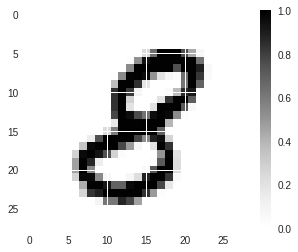

In [6]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)

# plot the image
plt.imshow(sample_img).set_cmap('Greys')
plt.colorbar()

## Training Labels
![mnist.train.ys](https://www.tensorflow.org/versions/master/images/mnist-train-ys.png)

In [7]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [8]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

# Defining a Neural Network

## in a graph:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-scalargraph.png)

## in a vector equation:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-vectorequation.png)

## so that we'll have the weights like this:
blue: positive weights, red: negative weights
![](https://www.tensorflow.org/versions/master/images/softmax-weights.png)

In [9]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b) # the equation
y

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

# Defining the Train Step

In [10]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent' type=NoOp>

## Use Gradient Decent to find the optimal weights
![](http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png)
From: [Machine Learning Blog & Software Development News](http://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/)

# Do 1000 times of mini-batch training

In [11]:
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size=100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if np.mod(i,100)==0: print('minibatch #: '+str(i))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
minibatch #: 0
minibatch #: 100
minibatch #: 200
minibatch #: 300
minibatch #: 400
minibatch #: 500
minibatch #: 600
minibatch #: 700
minibatch #: 800
minibatch #: 900


# Test

In [12]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9135


sample_prediction = 9
sample_label = 9


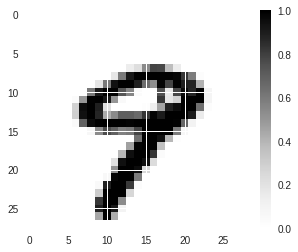

In [13]:
# do a demonstration
idx = 9
sample_image = mnist.test.images[idx].reshape(28,28)
sample_label = mnist.test.labels[idx]
sample_prediction = sess.run(y, feed_dict={x: sample_image.reshape(1,-1)})
print('sample_prediction = '+str(np.argmax(sample_prediction)))
print('sample_label = '+str(np.argmax(sample_label)))
plt.imshow(sample_image).set_cmap('Greys')
plt.colorbar()

sample_prediction = [[3.6434299e-06 7.1318224e-10 1.5608934e-07 8.4247858e-07 1.4475590e-02
  2.4886338e-05 2.2826937e-06 7.9938054e-02 6.8072556e-03 8.9874721e-01]]


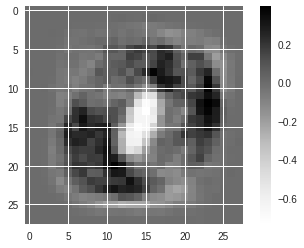

In [17]:
# do some analysis
print('sample_prediction = '+str(sample_prediction))
weights = sess.run(W).reshape(28,28,10)
plt.imshow(weights[:,:,0])
plt.colorbar()

# Visualizing with TensorBoard

See [TensorBoard tutorial](https://www.tensorflow.org/versions/master/how_tos/summaries_and_tensorboard/index.html) for documentation.

**Activate tensorboard**
Run a few shell commands to tell tensorboard to start reading from the logs folder (where tensorflow will store the intermediate values). Then a few commands tells tensorboard to tunnel the data to a link that we can access 

In [0]:
# download and install ngrok
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2018-08-28 23:52:41--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.204.22.7, 34.206.253.53, 52.20.145.121, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.204.22.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  10.1MB/s    in 0.5s    

2018-08-28 23:52:41 (10.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
# start tensorboard on colab server
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

# tunnel tensorboard from colab servers to outside world
get_ipython().system_raw('./ngrok http 6006 &')

# get url to the ngrok server
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

**Rebuild Graph**
First we will start over and rebuild our graph. This time, however, we store important variables to file using tf.summary

In [0]:
# -------- CODE FROM BEFORE --------

tf.reset_default_graph()
import tensorflow as tf

# define a neural network (softmax logistic regression)
x = tf.placeholder(tf.float32, [None, 784], name='input_image')
W = tf.Variable(tf.zeros([784, 10]), name='weights')
b = tf.Variable(tf.zeros([10]), name='bias')
y = tf.nn.softmax(tf.matmul(x, W) + b, name='softmax') # the equation

# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [0]:
# ---------- NEW CODE --------
import time
! rm -rf log

# store data for tensorboard visualization
tf.summary.scalar('accuracy', accuracy)
tf.summary.scalar('cross_entropy', cross_entropy)
weights_summary = tf.reshape(tf.transpose(W), [10,28,28,1])
tf.summary.image('weights', weights_summary)
merged = tf.summary.merge_all()

# close previous session, initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
train_writer = tf.summary.FileWriter('./log' + '/train', sess.graph)
test_writer = tf.summary.FileWriter('./log' + '/test', sess.graph)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
  
    # train step
    batch_xs, batch_ys = mnist.train.next_batch(batch_size=100)
    summaries, _ = sess.run([merged, train_step], feed_dict={x: batch_xs, y_: batch_ys})
    train_writer.add_summary(summaries, i)

    # test step
    batch_xs, batch_ys = mnist.train.images, mnist.train.labels
    summaries = sess.run(merged, feed_dict={x: batch_xs, y_: batch_ys})
    test_writer.add_summary(summaries, i)
    
    # print every 10 iterations
    if np.mod(i,10)==0: print('minibatch #: '+str(i))
    time.sleep(0)

minibatch #: 0
minibatch #: 10
minibatch #: 20
minibatch #: 30
minibatch #: 40
minibatch #: 50
minibatch #: 60
minibatch #: 70
minibatch #: 80
minibatch #: 90
minibatch #: 100
minibatch #: 110
minibatch #: 120
minibatch #: 130
minibatch #: 140
minibatch #: 150
minibatch #: 160
minibatch #: 170
minibatch #: 180
minibatch #: 190
minibatch #: 200
minibatch #: 210
minibatch #: 220
minibatch #: 230
minibatch #: 240
minibatch #: 250
minibatch #: 260
minibatch #: 270
minibatch #: 280
minibatch #: 290
minibatch #: 300
minibatch #: 310
minibatch #: 320
minibatch #: 330
minibatch #: 340
minibatch #: 350
minibatch #: 360
minibatch #: 370
minibatch #: 380
minibatch #: 390
minibatch #: 400
minibatch #: 410
minibatch #: 420
minibatch #: 430
minibatch #: 440
minibatch #: 450
minibatch #: 460
minibatch #: 470
minibatch #: 480
minibatch #: 490
minibatch #: 500
minibatch #: 510
minibatch #: 520
minibatch #: 530
minibatch #: 540
minibatch #: 550
minibatch #: 560
minibatch #: 570
minibatch #: 580
minibatc